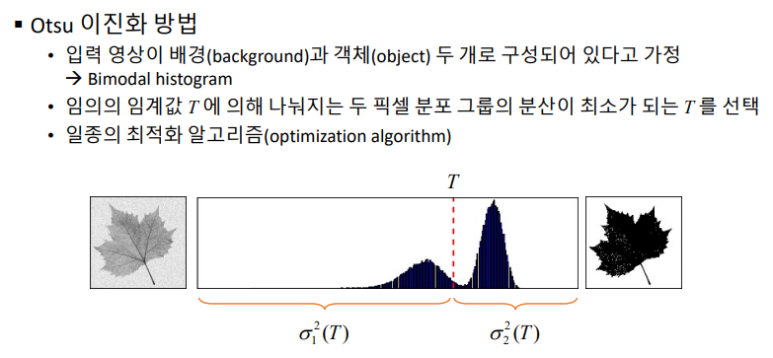  
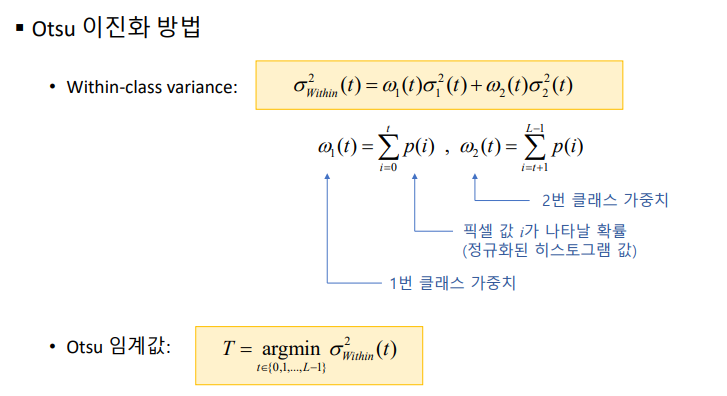  
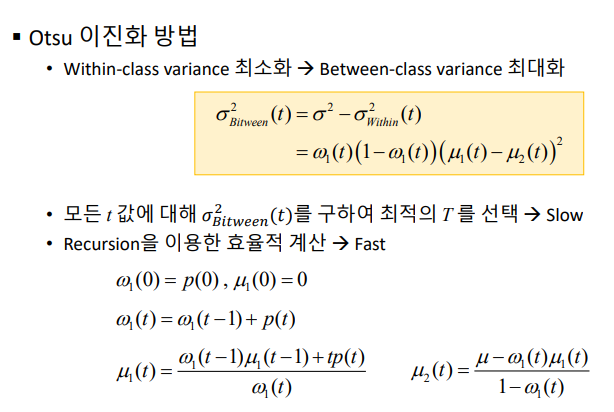

In [3]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

!pip install opencv-python

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x1c411e10ac0>)

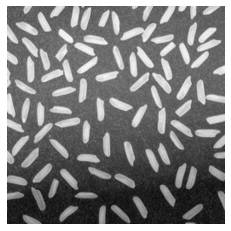

In [15]:
src = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)
plt.axis('off'),plt.imshow(src,cmap='gray')

In [16]:
if src is None:
    print('Image load failed!')
    sys.exit()

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x1c411e60880>)

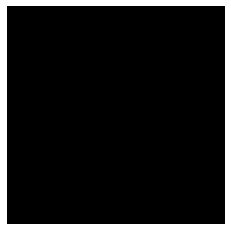

In [17]:
dst1 = np.zeros(src.shape, np.uint8)
plt.axis('off'),plt.imshow(dst1,cmap='gray')

지역 이진화를 해주는 코드입니다.

In [18]:
bw = src.shape[1] // 4
bh = src.shape[0] // 4
for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        dst_ = dst1[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)

OTSU Threshold를 통해 영상에 적합한 Threshold를 영역별로 지정해 줍니다.  
그대로 쓰게 되면 노이즈까지 카운트하기 때문에 쌀알 개수를 세는데 방해가 됩니다.  
영상안에 들어있는 흰색덩어리의 개수를 정수형태로 리턴해 줍니다.  
- OTSU 방법을 쓸 때에는 threshold 값을 0으로 줍니다. 만약 128로 준다한들 무시하니까요.  
- THRESH_BINARY 부분은 안줘도 상관없습니다.

cnt1: 113


((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x1c411eb6550>)

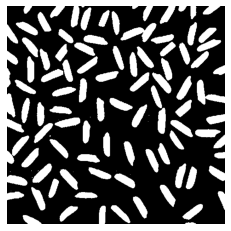

In [19]:
cnt1, _ = cv2.connectedComponents(dst1)
print('cnt1:', cnt1)
plt.axis('off'),plt.imshow(dst1,cmap='gray')

오프닝 연산을 통해 노이즈를 제거해 줍니다

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x1c411b61520>)

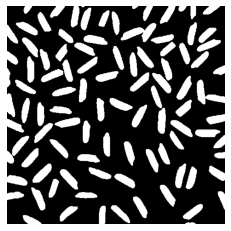

In [20]:
dst2 = cv2.morphologyEx(dst1, cv2.MORPH_OPEN, None)
plt.axis('off'),plt.imshow(dst2,cmap='gray')

count함수를 통해 영상의 흰색 덩어리의 개수를 cnt2가 받아줍니다.

In [21]:
cnt1, _ = cv2.connectedComponents(dst1)
print('cnt1:', cnt1)
cnt2, _ = cv2.connectedComponents(dst2)
print('cnt2:', cnt2)

cnt1: 113
cnt2: 99


원본, 지역이진화, 지역이진화+오프닝연산

(<AxesSubplot:>,
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x1c411c165e0>)

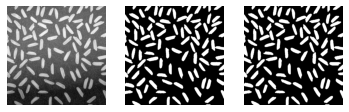

In [22]:
plt.subplot(131),plt.axis('off'),plt.imshow(src,cmap='gray')
plt.subplot(132),plt.axis('off'),plt.imshow(dst1,cmap='gray')
plt.subplot(133),plt.axis('off'),plt.imshow(dst2,cmap='gray')

In [23]:
cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()